In [1]:
from typing import List, Tuple

import matplotlib.pyplot as plt

from Experiment import Experiment
from ExperimentalConfig import ExperimentalConfig
from elections.ElectionConstructor import ElectionConstructor, construct_irv, construct_h2h
from elections.Candidate import Candidate


In [2]:


def build_plurality_model():
    config = ExperimentalConfig("Plurality",
                                10000,
                                1.5, .7, 21, 512, 3, 20000, 2048, 400, 400, "exp/plurality-0")
    config.save()
    exp = Experiment(config)
    return exp.run_strategic_races_core(1000)

plurality_wc = build_plurality_model()

    0 w.ideology: -0.5819
  100 w.ideology: -0.675
  200 w.ideology: 0.9267
  300 w.ideology: -0.5565
  400 w.ideology: 0.1998
  500 w.ideology: -0.693
  600 w.ideology: 0.2744
  700 w.ideology: 0.7137
  800 w.ideology: -0.6101
  900 w.ideology: 0.7935


2021-07-29 11:05:52.197537: I tensorflow/core/platform/cpu_feature_guard.cc:142] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2021-07-29 11:05:52.373866: I tensorflow/compiler/mlir/mlir_graph_optimization_pass.cc:176] None of the MLIR Optimization Passes are enabled (registered 2)


In [3]:
import numpy as np
def plot_results(results: List[List[float]], title: str, labels: List[str]):
    n_rows = 1
    n_cols = 1
    fig, axis = plt.subplots(nrows=n_rows, ncols=n_cols, figsize=(20, 10))
    fig.suptitle(title, color="black", fontsize=22)
    fig.set_facecolor("white")

    count = 0
    plt.xticks(fontsize=16)
    plt.yticks(fontsize=16)

    axis.tick_params(axis='x', colors="black")
    axis.tick_params(axis='y', colors="black")
    axis.set_xlim([-1, 1])

    bins = np.arange(-1, 1, 2/21)
    axis.hist(results, bins=bins, label=labels, edgecolor='white', stacked=True)
    axis.legend()
    axis.set_xlabel("Sigma From Origin", fontsize=20)
    axis.set_ylabel("Frequency of Winner at Ideology", fontsize=20)

    plt.savefig("foo.png")

In [4]:
def results_for_candidate(results: List[Tuple[Candidate, List[Candidate]]], candidate_name: str, wins_only: bool):
    ideologies = []
    for w, cc in results:
        if wins_only and w.name == candidate_name:
            ideologies.append(w.ideology.vec[0])
        elif not wins_only:
            for c in cc:
                if c.name == candidate_name:
                    ideologies.append( c.ideology.vec[0] )

    print(f"found {len(ideologies)} results")
    return ideologies

In [5]:
names = ["L", "C", "R", "c-0", "c-1"]

In [6]:
# for name in names:
#     results = results_for_candidate(name, True)
    # plot_results(results, f"Ideology of Wins for {name}", [f"wins for {name}"])

found 337 results
found 237 results
found 317 results
found 53 results
found 56 results


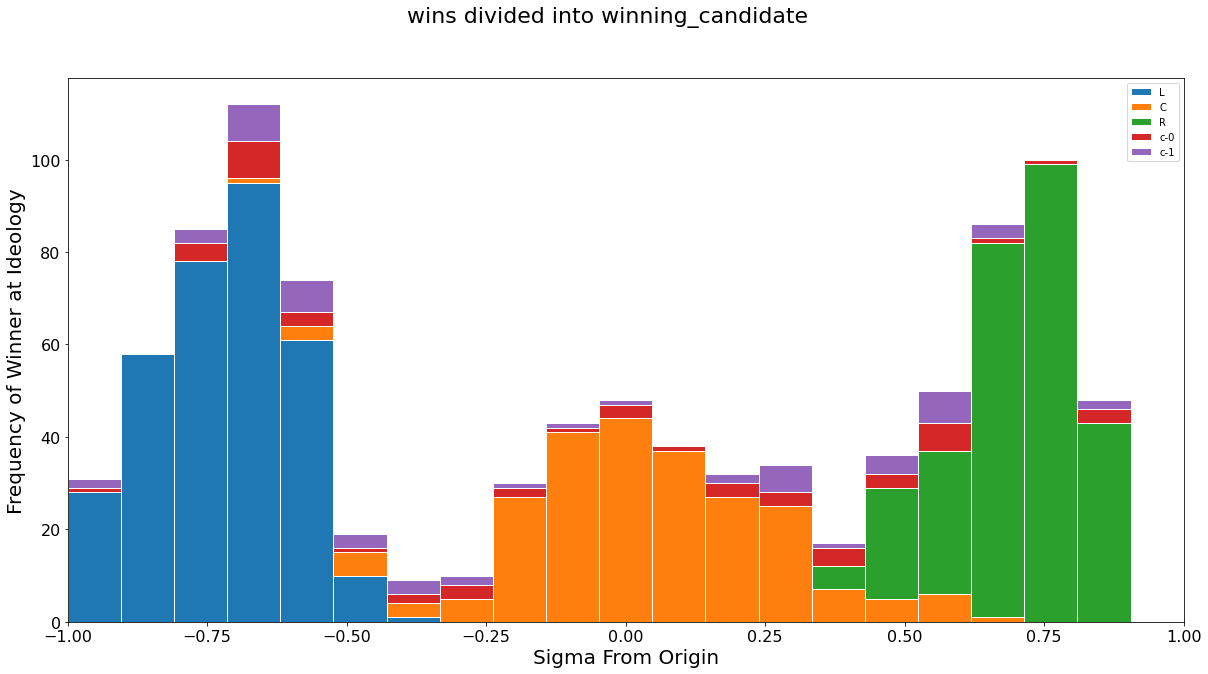

In [7]:
def plot_wins():
    results = [results_for_candidate(plurality_wc, n, True) for n in names]
    plot_results(results, f"wins divided into winning_candidate", names)
plot_wins()

found 1000 results
found 1000 results
found 1000 results
found 1000 results
found 1000 results


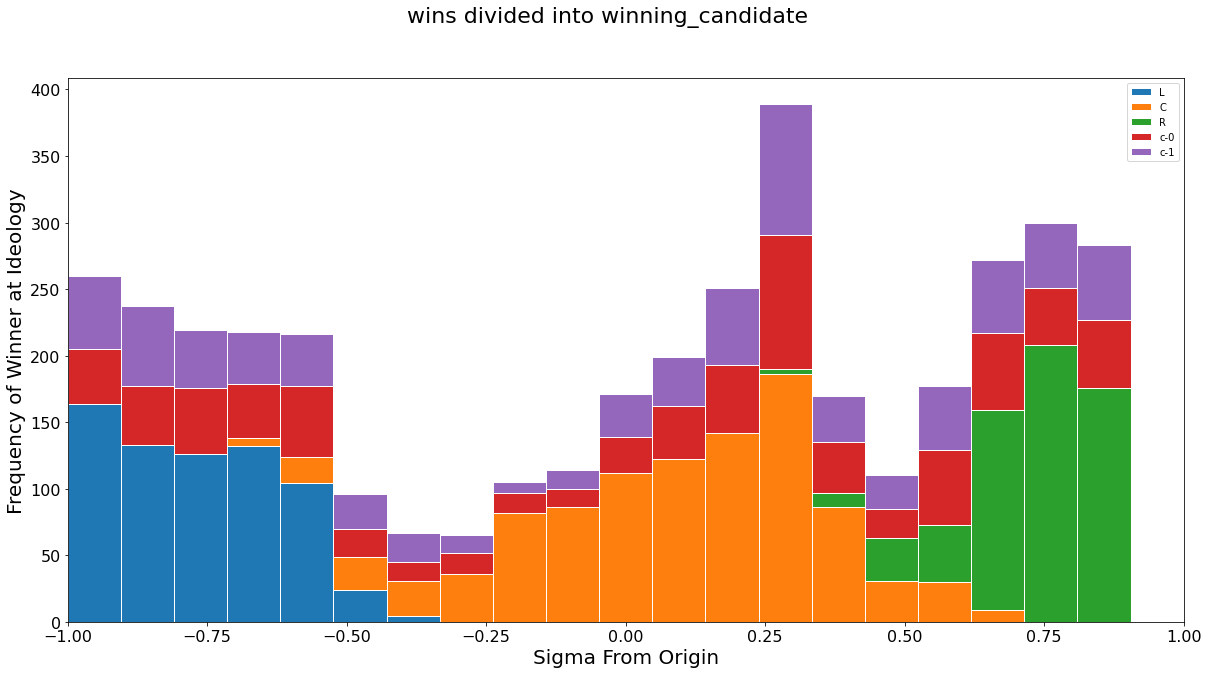

In [8]:
def plot_runs():
    results = [results_for_candidate(plurality_wc, n, False) for n in names]
    plot_results(results, f"wins divided into winning_candidate", names)
plot_runs()